In [2]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB 7.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.9 MB 8.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 MB 7.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.9 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.9 MB 6.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.9 MB 5.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.9 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 5.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.8/9.9 MB 5.0 MB/s eta 0:00:02
   ------------ ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
np.set_printoptions(threshold=np.inf)
pd.set_option('expand_frame_repr', False)


In [4]:
mcdonalds = pd.read_csv('mcdonalds.csv')
print("Attribues of mcdonald's dataset: ")
print(mcdonalds.columns)
print("Dimention of dataset: ", mcdonalds.shape)
print("First ten rows of dataset: ")
print(mcdonalds[:10])

Attribues of mcdonald's dataset: 
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Dimention of dataset:  (1453, 15)
First ten rows of dataset: 
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy disgusting          Like  Age      VisitFrequency  Gender
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No         No            -3   61  Every three months  Female
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No         No            +2   51  Every three months  Female
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes         No            +1   62  Every three months  Female
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No        Yes            +4   69         Once a week  Female
4    No        Yes    N

In [5]:
md_x = mcdonalds.iloc[:, :11].values
print(md_x[:10])
md_x = (md_x == "Yes").astype(int)
print(md_x[:10])
col_mean = np.round(np.mean(md_x, axis=0), 2)
col_mean1 = pd.DataFrame(col_mean, mcdonalds.columns[:11])
print("Mean of all values for particular attribute: ", col_mean1[:10])

[['No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No']
 ['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes']
 ['No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No']
 ['Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No']
 ['Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No']
 ['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No']
 ['No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes']
 ['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No']]
[[0 1 0 1 0 1 1 0 1 0 0]
 [1 1 0 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 0 1 1 1 0]
 [1 1 0 1 1 1 1 1 0 0 1]
 [0 1 0 1 1 1 1 0 0 1 0]
 [1 1 0 1 0 1 1 1 0 0 0]
 [1 1 1 1 0 1 0 1 1 1 0]
 [1 1 0 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 0 0 0 1 0 1]
 [1 1 0 1 1 1 0 1 1 0 0]]
Mean of all values for particular attribute:                 0
yummy       0.55
convenient  0.91
spic

In [6]:
pca = PCA()
md_pca = pca.fit(md_x)
std_dev = np.sqrt(md_pca.explained_variance_)
proportion_variance = md_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(proportion_variance)

In [7]:
pca_summary = pd.DataFrame({
    "principal component": [f'PC{i+1}' for i in range(len(proportion_variance))],
    "standard deviation": np.round(std_dev, 2),
    "proportion variance": np.round(proportion_variance, 2),
    "cumulative variance": np.round(cumulative_variance, 2)
})
print(pca_summary)

   principal component  standard deviation  proportion variance  cumulative variance
0                  PC1                0.76                 0.30                 0.30
1                  PC2                0.61                 0.19                 0.49
2                  PC3                0.50                 0.13                 0.63
3                  PC4                0.40                 0.08                 0.71
4                  PC5                0.34                 0.06                 0.77
5                  PC6                0.31                 0.05                 0.82
6                  PC7                0.29                 0.04                 0.86
7                  PC8                0.28                 0.04                 0.90
8                  PC9                0.27                 0.04                 0.94
9                 PC10                0.25                 0.03                 0.97
10                PC11                0.24                 0.03  

In [8]:
rotation_matrix = md_pca.components_.T
rotation_df = pd.DataFrame(
    rotation_matrix,
    columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])],
    index=mcdonalds.columns[:11]
)
print(rotation_df)

                 PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      PC11
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738 -0.280519  0.013041  0.572403 -0.110284  0.045439
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830 -0.059738 -0.113079 -0.018465 -0.665818 -0.541616
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087  0.707637  0.375934  0.400280 -0.075634  0.141730
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515 -0.385943  0.589622 -0.160512 -0.005338  0.250910
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347  0.036170 -0.138241 -0.002847  0.008707  0.001642
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632 -0.086846 -0.627799  0.166197  0.239532  0.339265
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241 -0.040449  0.140060  0.076069  0.428087 -0.489283
tasty      -0.471514  0.307318 -

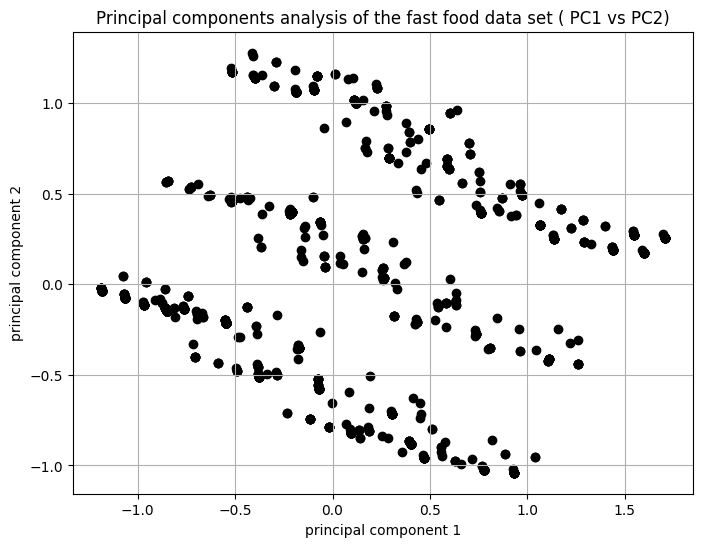

In [9]:
scores = pca.transform(md_x)
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='black')
plt.title("Principal components analysis of the fast food data set ( PC1 vs PC2)")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.grid()

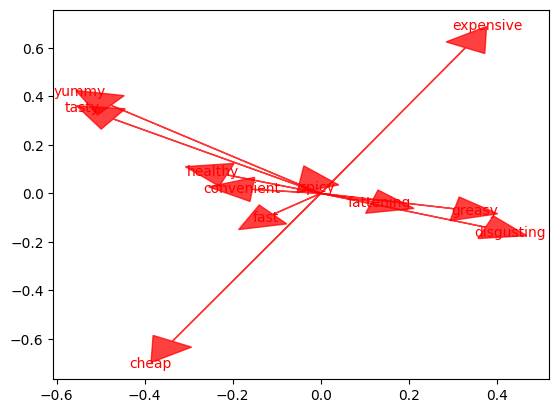

In [10]:
for i, (com1, com2) in enumerate(pca.components_[:2].T):
    plt.arrow(0, 0, com1, com2, color='r', alpha=0.75, head_width=0.10, head_length=0.10),
    plt.text(com1*1.15, com2*1.15, mcdonalds.columns[i], color='r', ha='center', va='center')
plt.show()

Best number of clusters: 8


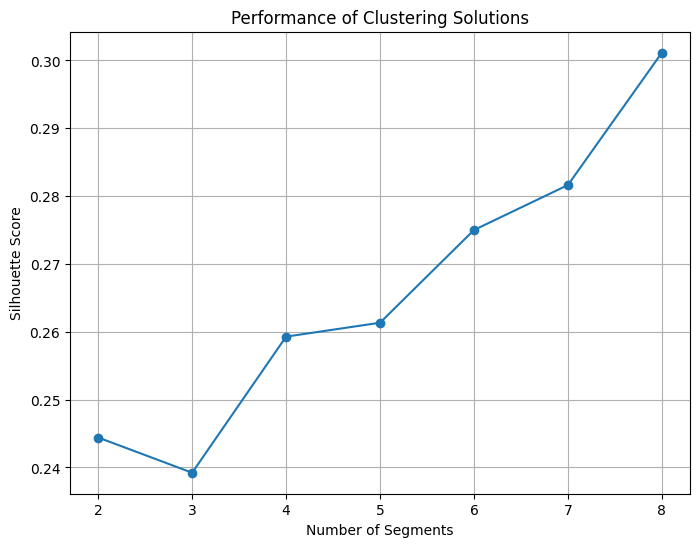

In [11]:
np.random.seed(1234)
results = []
silhouette_val = []

for k in range(2,9):
    best_model = None
    best_score = -1
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(0, 10000))
        kmeans.fit(md_x)
        score = silhouette_score(md_x, kmeans.labels_)
        if score > best_score:
            best_model = kmeans
            best_score = score

    results.append(best_model)
    silhouette_val.append(best_score)
best_k = np.argmax(silhouette_val) + 2
best_model = results[best_k - 2]
print(f"Best number of clusters: {best_k}")
labels = best_model.labels_

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_val, marker='o')
plt.title('Performance of Clustering Solutions')
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')  # Useful to evaluate the quality of clustering.
plt.grid(True)
plt.show()

In [12]:
def bootstrap_kmeans_single(X, k, nrep=10):
    bootstrap_idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
    X_bootstrap = X[bootstrap_idx, :]

    labels_list = [KMeans(n_clusters=k, n_init=10).fit(X_bootstrap).labels_ for _ in range(nrep)]
    ari_scores = []
    for i in range(nrep):
        for j in range(i + 1, nrep):
            ari_scores.append(adjusted_rand_score(labels_list[i], labels_list[j]))

    return np.mean(ari_scores)


def bootstrap_kmeans_parallel(X, n_clusters_range, nboot=100, nrep=10, n_jobs=-1):
    ari_results = {}

    for k in n_clusters_range:
        ari_scores = Parallel(n_jobs=n_jobs)(delayed(bootstrap_kmeans_single)(X, k, nrep) for _ in range(nboot))
        ari_results[k] = np.mean(ari_scores)

    return ari_results

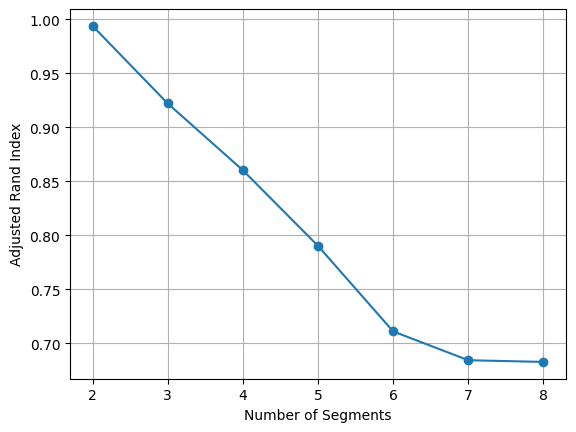

In [13]:
n_clusters_range = range(2, 9)
nboot = 50
nrep = 10

ari_results = bootstrap_kmeans_parallel(md_x, n_clusters_range, nboot=nboot, nrep=nrep, n_jobs=-1)

plt.plot(list(ari_results.keys()), list(ari_results.values()), marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()

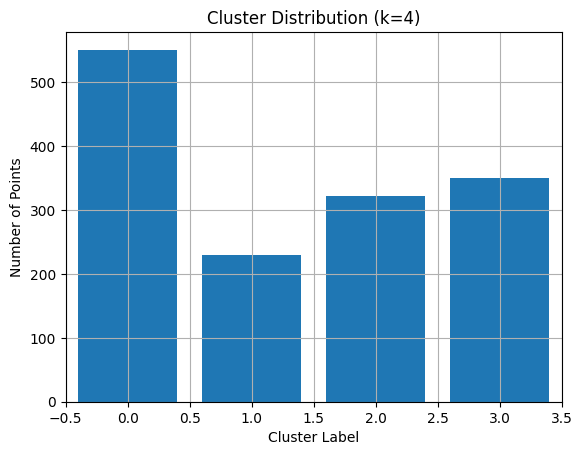

In [14]:
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(md_x)
labels_4 = kmeans_4.labels_

plt.hist(labels_4, bins=np.arange(5) - 0.5, rwidth=0.8)
plt.xlim(-0.5, 3.5)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Distribution (k=4)')
plt.grid(True)
plt.show()

In [15]:
#  Using Mixtures of Regression Models

frequency_table = mcdonalds['Like'].value_counts()
reversed_frequency_table = frequency_table[::1]
print(reversed_frequency_table)
Like_count = pd.DataFrame(reversed_frequency_table)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Like_count)

gmm_initial = GaussianMixture(n_components=11, random_state=1234)
gmm_initial.fit(data_scaled)

gmm_refitted = GaussianMixture(n_components=11, random_state=1234)
gmm_refitted.fit(data_scaled)
print("Convergence status:", gmm_refitted.converged_)
print("Number of iterations:", gmm_refitted.n_iter_)
print("Means of components:\n", gmm_refitted.means_)
print("Covariances of components:\n", gmm_refitted.covariances_)
print("Weights of components:\n", gmm_refitted.weights_)

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64
Convergence status: True
Number of iterations: 2
Means of components:
 [[ 0.6686682 ]
 [-1.10676115]
 [ 1.75566576]
 [ 0.36068555]
 [ 0.99476747]
 [-1.34227729]
 [ 0.19763592]
 [ 0.50561856]
 [-1.0705279 ]
 [-1.32416067]
 [ 0.        ]]
Covariances of components:
 [[[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]

 [[1.e-06]]]
Weights of components:
 [9.09090909e-02 9.09090909e-02 9.09090909e-02 1.81818182e-01
 9.09090909e-02 9.09090909e-02 9.09090909e-02 9.09090909e-02
 9.09090909e-02 9.09090909e-02 2.01858732e-16]


C:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [16]:
# STEP 6: PROFILING SEGMENTS
dataframe = pd.DataFrame(md_x)
kmeans = KMeans(n_clusters=4, random_state=1234)
dataframe['Cluster'] = kmeans.fit_predict(dataframe)

cluster_counts = dataframe['Cluster'].value_counts()
cc = pd.DataFrame(cluster_counts)
cluster_percentages = (cluster_counts / len(dataframe)) * 100
cp = pd.DataFrame(cluster_percentages)

print("Cluster Counts:\n", cluster_counts)
print("Cluster Percentages:\n", cluster_percentages)

cluster_means = dataframe.groupby('Cluster').mean()
cluster_means = cluster_means.reset_index()
print(cluster_means)

Cluster Counts:
 Cluster
0    551
3    350
2    322
1    230
Name: count, dtype: int64
Cluster Percentages:
 Cluster
0    37.921542
3    24.088094
2    22.161046
1    15.829319
Name: count, dtype: float64
   Cluster         0         1         2         3         4         5         6         7         8         9        10
0        0  0.892922  0.980036  0.087114  0.789474  0.346642  0.961887  0.970962  0.983666  0.018149  0.335753  0.043557
1        1  0.017391  0.647826  0.078261  0.908696  0.704348  0.730435  0.073913  0.095652  0.952174  0.065217  0.700000
2        2  0.024845  0.900621  0.077640  0.928571  0.664596  0.953416  0.878882  0.152174  0.009317  0.068323  0.413043
3        3  0.854286  0.971429  0.128571  0.905714  0.565714  0.865714  0.100000  0.922857  0.822857  0.191429  0.100000


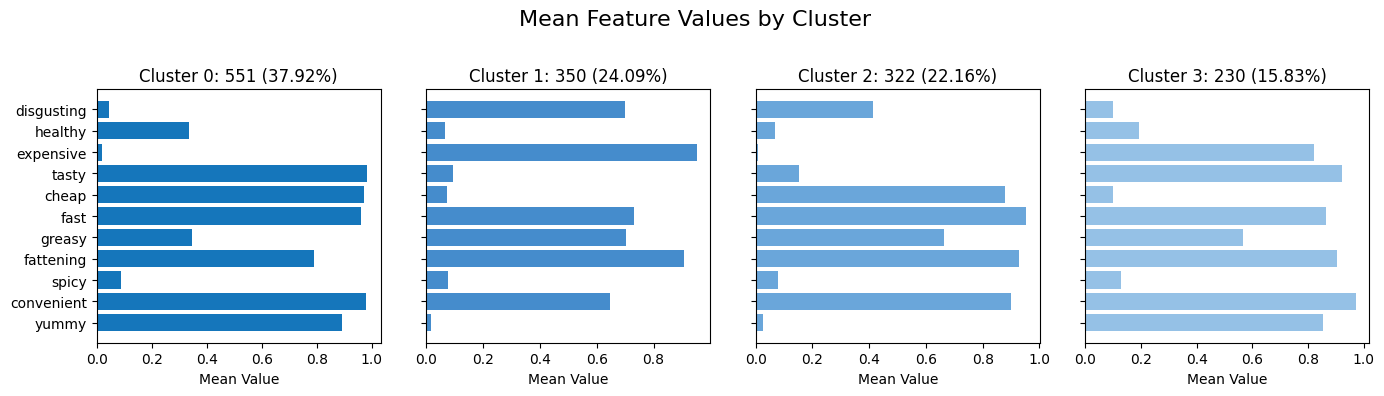

In [17]:
num_clusters = cluster_means['Cluster'].nunique()
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(14, 4), sharey=True)
fig.suptitle('Mean Feature Values by Cluster', fontsize=16)
color = ['#1576BB', '#458CCC', '#6AA6DA', '#95C1E6']

for i in range(num_clusters):
    cluster_data = cluster_means[cluster_means['Cluster'] == i].drop('Cluster', axis=1).melt(var_name='Feature', value_name='MeanValue')
    axes[i].barh(mcdonalds.columns[:11], cluster_data['MeanValue'], color=color[i])
    axes[i].set_title(f'Cluster {i}: {cc.iloc[i, 0].round(2)} ({cp.iloc[i, 0].round(2)}%)')
    axes[i].set_xlabel('Mean Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

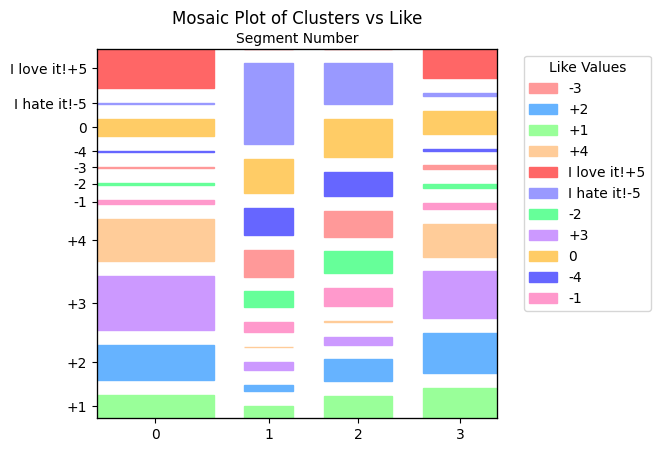

In [18]:
#STEP 7: DESCRIBING SEGMENTS
def color_fun(key):
    try:
        like_value = key[1]
        return {'color': like_colors.get(like_value, '#cccccc')}
    except (KeyError, ValueError) as e:
        print(f"Error in color_func with key {key}: {e}")
        return {'color': '#cccccc'}


def empty_labelizer(key):
    return ""

likes = mcdonalds['Like'][:100].unique()
like_colors = {
    likes[0]: '#ff9999',
    likes[1]: '#66b3ff',
    likes[2]: '#99ff99',
    likes[3]: '#ffcc99',
    likes[4]: '#ff6666',
    likes[5]: '#9999ff',
    likes[6]: '#66ff99',
    likes[7]: '#cc99ff',
    likes[8]: '#ffcc66',
    likes[9]: '#6666ff',
    likes[10]: '#ff99cc'
}
colors = ['#1576BB', '#458CCC', '#6AA6DA', '#95C1E6']
Like = pd.crosstab(dataframe['Cluster'], mcdonalds['Like'])
mosaic(Like.stack(), gap=0.10, title='Mosaic Plot of Clusters vs Like', properties=color_fun, labelizer=empty_labelizer)
patches = [mpatches.Patch(color=like_colors[like], label=like) for like in likes]
plt.legend(handles=patches, title="Like Values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Segment Number')
plt.subplots_adjust(right=0.75)
plt.show()

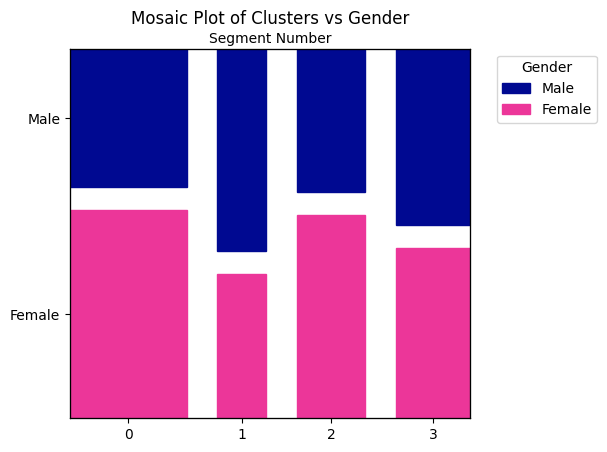

In [19]:
def gender_color_fun(key):
    try:
        gender_value = key[1]
        return {'color': gender_colors.get(gender_value, '#cccccc')}
    except (KeyError, ValueError) as e:
        print(f"Error in color_func with key {key}: {e}")
        return {'color': '#cccccc'}


gender_colors = {
    'Male': '#000991',
    'Female': '#EC3699'
}
Gender = pd.crosstab(dataframe['Cluster'], mcdonalds['Gender'])
mosaic(Gender.stack(), gap=0.10, title='Mosaic Plot of Clusters vs Gender', properties=gender_color_fun, labelizer=empty_labelizer)
patches = [mpatches.Patch(color=gender_colors[gender], label=gender) for gender in gender_colors]
plt.legend(handles=patches, title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Segment Number')
plt.subplots_adjust(right=0.75)
plt.show()

In [20]:
#STEP 8: SELECTING THE TARGET SEGMENTS
like_encoder = LabelEncoder()
visit_encoder = LabelEncoder()

mcdonalds['Like_numeric'] = like_encoder.fit_transform(mcdonalds['Like'])
mcdonalds['Visit_numeric'] = visit_encoder.fit_transform(mcdonalds['VisitFrequency'])
dataframe = pd.DataFrame(md_x)
kmeans = KMeans(n_clusters=4, random_state=1234)
mcdonalds['Cluster'] = kmeans.fit_predict(dataframe)
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

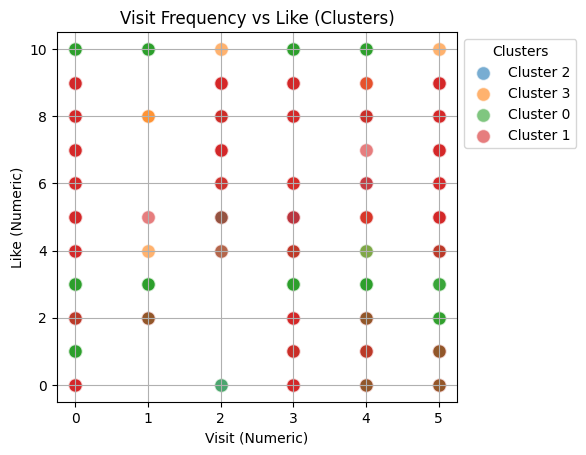

In [21]:
for cluster in mcdonalds['Cluster'].unique():
    cluster_data = mcdonalds[mcdonalds['Cluster'] == cluster]
    plt.scatter(cluster_data['Visit_numeric'], cluster_data['Like_numeric'],
                label=f'Cluster {cluster}',
                alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Visit (Numeric)')
plt.ylabel('Like (Numeric)')
plt.title('Visit Frequency vs Like (Clusters)')
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()